Introductory Application of Brownian Motion in Sports Betting

Brownian Motion Sources:

https://www.quantstart.com/articles/Brownian-Motion-and-the-Wiener-Process/

https://www.quantstart.com/articles/brownian-motion-simulation-with-python/

Sports Betting Application Source: https://www.degruyter.com/document/doi/10.1515/jqas-2014-0095/html?lang=en

*Standard (Non Sports) Example*:  

Let $X(t), \space t ≥ 0$ be a Brownian motion process with drift parameter $µ = 3$ and variance parameter $𝜎^2 = 9$. 

If $X(0) = 10$, find $P(X(2) > 20)$.
$$
X(t) = μt + σB(t) \space where \space X(2) \texttt{\char`\~} N(X(0)+2μ, 2σ^2)
$$
$$
= X(2) \space \texttt{\char`\~} \space N(10 + 2(3), 9(2))
$$
$$
= X(2)\space \texttt{\char`\~} \space N(16, 18)
$$
$$
P(X(2) > 20) = P(\frac{X(2) -16}{√18} > \frac{20-16}{√18})
$$
$$
= \phi(\frac{-4}{√18}) \space where \space \phi \space is \space the \space standard \space normal \space cdf
$$
$$
= 0.173
$$

------------------------------

In Terms of Sports Betting:

The distribution of point lead of Team A over Team B at time $t, \space X(t)$. 

drift parameter $μ$ = advantage in points in team A (point spread)

volatility parameter $σ$ = standard deviation of outcome

Assumption that score follows normal distribution.

Outcome $X(t)$ defined as Standard Brownian Motion: $ X(t) = μt + σB(t) \space \texttt{\char`\~} \space N(μt, σ^2t)$

------------------------
Example:

What are the simulated potential distributions of point leads of Team A if the drift parameter is 4 points and volatility parameter is 2 points?





In [64]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [65]:
rng = np.random.default_rng(42)

In [66]:
#k simulated paths and n time steps
paths = 50
points = 5

In [67]:
mu, sigma = 4, 2

In [68]:
Z = rng.normal(mu, sigma, (paths, points))

In [69]:
interval = [0.0, 1.0] #one game
dt = (interval[1] - interval[0]) / (points - 1)

In [70]:
t_axis = np.linspace(interval[0], interval[1], points)

In [71]:
W = np.zeros((paths, points))
for idx in range(points - 1):
    real_idx = idx + 1
    W[:, real_idx] = W[:, real_idx - 1] + np.sqrt(dt) * Z[:, idx]

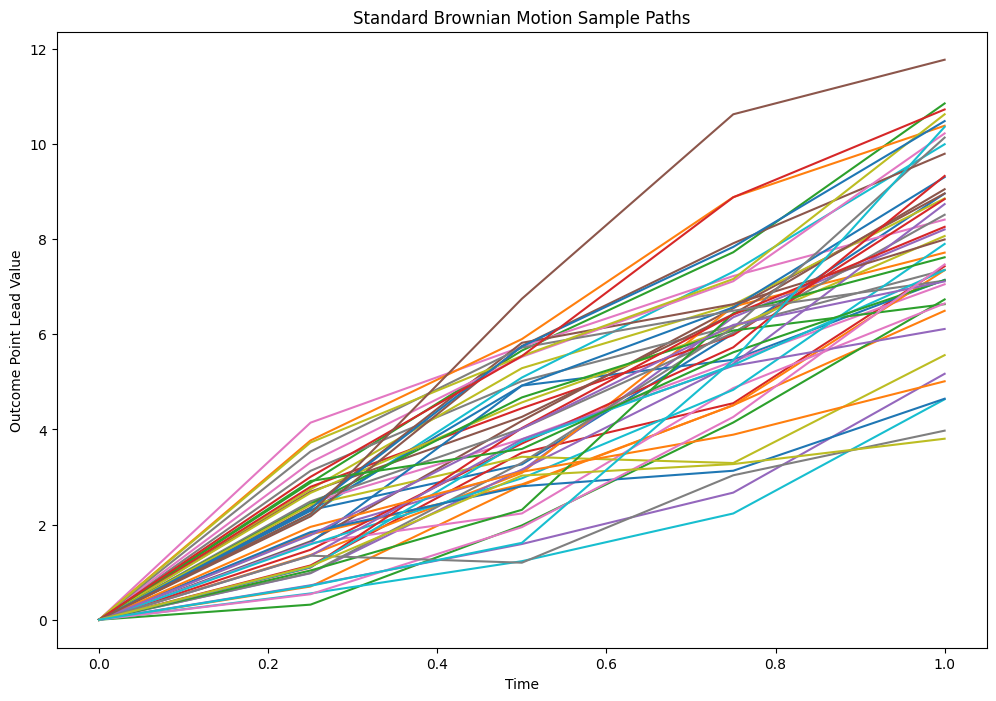

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
for path in range(paths):
    ax.plot(t_axis, W[path, :])
ax.set_title("Standard Brownian Motion Sample Paths")
ax.set_xlabel("Time")
ax.set_ylabel("Outcome Point Lead Value")
plt.show()